# Import Libraries

In [37]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

# Remove Invalid Images

In [2]:
data_dir = "data"
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# Load Data

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
data_iterator

Found 17760 files belonging to 2 classes.


In [5]:
batch = data_iterator.next()

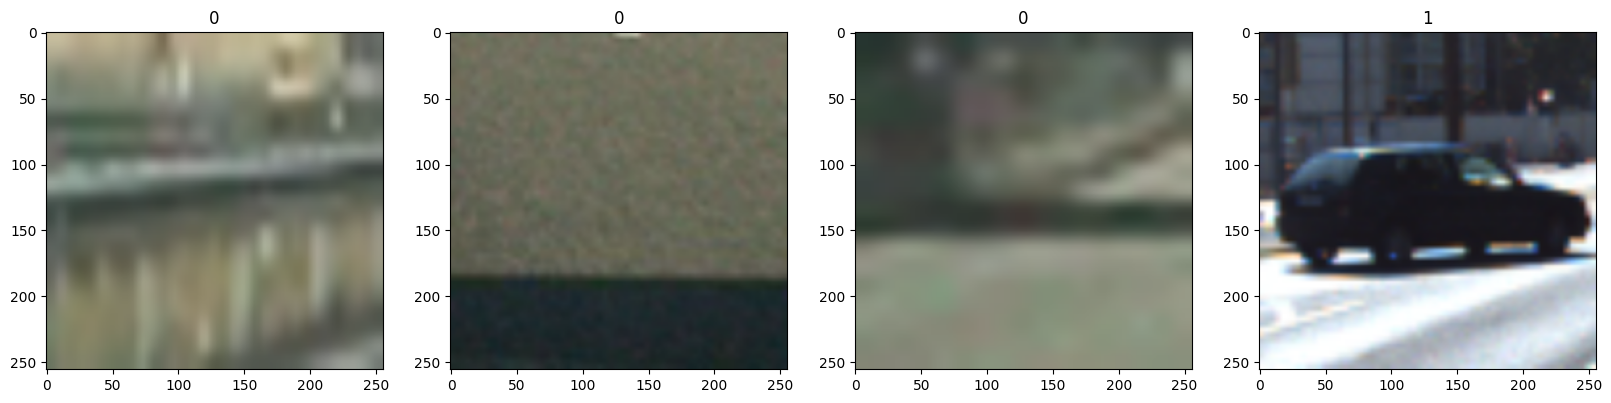

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# 1 = Vehicles
# 0 = Non-Vehicles

# Scale Data

In [7]:
scaled_data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
scaled_data.as_numpy_iterator().next()[0].max()

1.0

# Split Data

In [9]:
train_size = int(len(scaled_data)*.64)
val_size = int(len(scaled_data)*.16)
test_size = int(len(scaled_data)*.2)+1

In [10]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# Deep Model

In [11]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [14]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [15]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
355/355 [==============================] - 401s 1s/step - loss: 0.2405 - accuracy: 0.8953 - val_loss: 0.1121 - val_accuracy: 0.9585
Epoch 2/20
355/355 [==============================] - 357s 1s/step - loss: 0.0887 - accuracy: 0.9699 - val_loss: 0.0667 - val_accuracy: 0.9812
Epoch 3/20
355/355 [==============================] - 341s 960ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0626 - val_accuracy: 0.9776
Epoch 4/20
355/355 [==============================] - 321s 902ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 5/20
355/355 [==============================] - 312s 878ms/step - loss: 0.0311 - accuracy: 0.9914 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 6/20
355/355 [==============================] - 311s 875ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 7/20
355/355 [==============================] - 342s 961ms/step - loss: 0.0213 - accuracy: 0.9925 - val_loss: 0.0358 - val_a

In [16]:
hist.history

{'loss': [0.24054966866970062,
  0.08872999995946884,
  0.04982365295290947,
  0.036315929144620895,
  0.031073855236172676,
  0.030502013862133026,
  0.02128012664616108,
  0.028945380821824074,
  0.03369459882378578,
  0.017942849546670914,
  0.007513289339840412,
  0.014903618954122066,
  0.030604364350438118,
  0.007391494233161211,
  0.007467437069863081,
  0.0021552410908043385,
  0.024861494079232216,
  0.007075973320752382,
  0.004437384661287069,
  0.015855150297284126],
 'accuracy': [0.8953344821929932,
  0.9698943495750427,
  0.9848591685295105,
  0.9881162047386169,
  0.9913732409477234,
  0.9901408553123474,
  0.9925175905227661,
  0.9908450841903687,
  0.9880281686782837,
  0.9943661689758301,
  0.9973591566085815,
  0.9945422410964966,
  0.9892605543136597,
  0.997535228729248,
  0.9974471926689148,
  0.999383807182312,
  0.9919013977050781,
  0.9980633854866028,
  0.998415470123291,
  0.9944542050361633],
 'val_loss': [0.11207130551338196,
  0.06671775132417679,
  0.062

# Validate Model

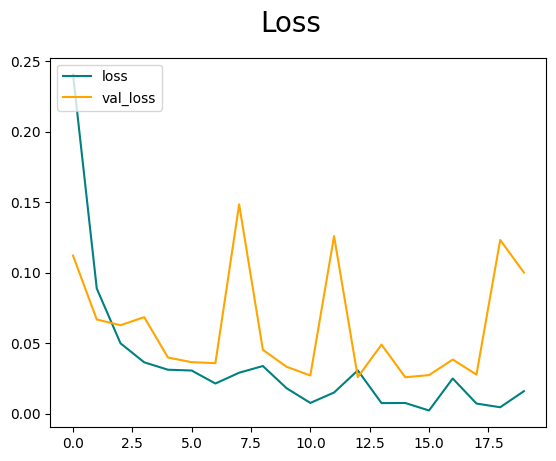

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

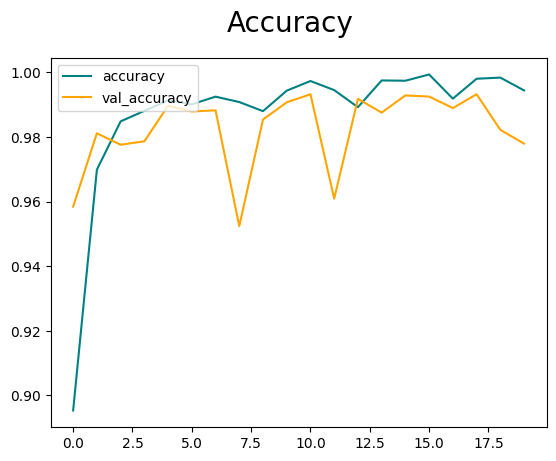

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [20]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 310ms/step


In [21]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result()}')

Precision: 0.9577308297157288, Recall: 0.9919354915618896, Accuracy: 0.9748883843421936


# Save Model

In [38]:
model.save(os.path.join('models', 'imageclassifier.h5'))

# Test Model 

In [39]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

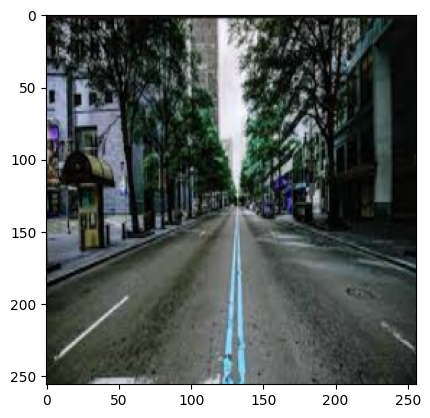

In [59]:
street_img = cv2.imread('test_images/classification/street.jpg')
street_img_resize = tf.image.resize(street_img, (256,256))
plt.imshow(street_img_resize.numpy().astype(int))
plt.show()

In [60]:
isCar = model.predict(np.expand_dims(street_img_resize/255, 0))
isCar

1/1 [==============================] - 0s 28ms/step


array([[2.8417942e-11]], dtype=float32)

In [61]:
if isCar > 0.5: 
    print(f'Predicted class is car')
else:
    print(f'Predicted class is background')

Predicted class is background


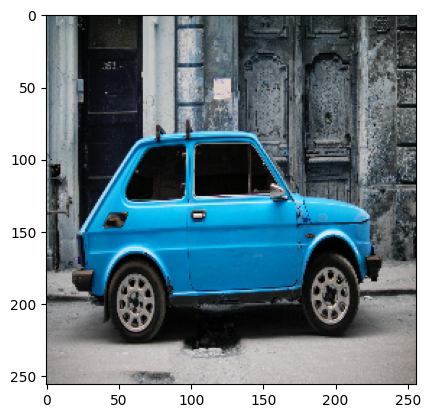

In [62]:
car_img = cv2.imread('test_images/classification/car.jpg')
car_img_resize = tf.image.resize(car_img, (256,256))
plt.imshow(car_img_resize.numpy().astype(int))
plt.show()

In [63]:
isCar = model.predict(np.expand_dims(car_img_resize/255, 0))
isCar

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)

In [64]:
if isCar > 0.5: 
    print(f'Predicted class is car')
else:
    print(f'Predicted class is background')

Predicted class is car


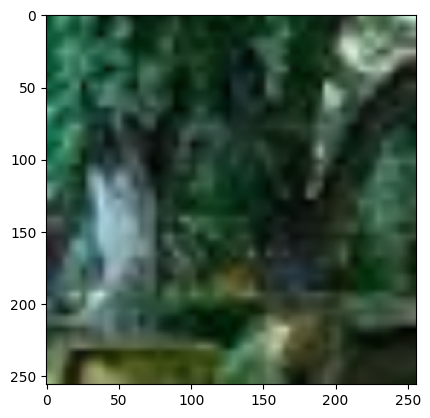

In [78]:
test_img = cv2.imread('positive/_pos_110.png')
test_img_resize = tf.image.resize(test_img, (256,256))
plt.imshow(test_img_resize.numpy().astype(int))
plt.show()

In [79]:
isCar = model.predict(np.expand_dims(test_img_resize/255, 0))
isCar

1/1 [==============================] - 0s 33ms/step


array([[0.9996067]], dtype=float32)